In [83]:
width = 299
height = 299
channels = 3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [90]:
img=mpimg.imread('Cat.png')[:, :, :channels]

(299, 299, 3)

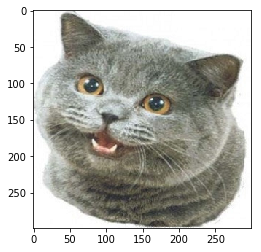

In [89]:
imgplot = plt.imshow(img)
img.shape


In [91]:
img = 2 * img - 1

In [74]:
import os

In [75]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [76]:
fetch_pretrained_inception_v3()

In [77]:
f = open('imagenet_class_names.txt', 'r')

In [78]:
content = f.read()
def load_class_names():
    with open(os.path.join( "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)
class_names = ["background"] + load_class_names()

In [79]:
class_names[:5]

['background',
 'tench, Tinca tinca\r',
 'goldfish, Carassius auratus\r',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\r',
 'tiger shark, Galeocerdo cuvieri\r']

In [80]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim
import tensorflow as tf

tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [81]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


In [92]:
X_test = img.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


In [93]:

most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

282

In [94]:
class_names[most_likely_class_index]

'tabby, tabby cat\r'

In [96]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

: 64.63%
: 25.18%
: 3.23%
: 0.48%
: 0.27%


In [102]:
width = 299
height = 299
channels = 3
img=mpimg.imread('pug.png')[:width, :height, :channels]

(299, 299, 3)

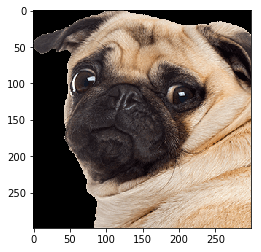

In [103]:
imgplot = plt.imshow(img)
img.shape

In [104]:
X_test = img.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from datasets\inception\inception_v3.ckpt


In [105]:
most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

255

In [106]:
class_names[most_likely_class_index]

'pug, pug-dog\r'

In [107]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

: 83.19%
: 0.84%
: 0.66%
: 0.29%
: 0.17%
